<a href="https://colab.research.google.com/github/MelanyRios/Clasificaci-nDeCochinillaCNN/blob/main/Copia_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "drive/MyDrive/Colab Notebooks/cochinilla"

bebes  gestando  muertas


In [ ]:
import os
import pandas as pd 
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf 
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
## batch specification
batch_size = 40
img_height = 200
img_width = 200


## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/Colab Notebooks/cochinilla',
    validation_split=0.1,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'drive/MyDrive/Colab Notebooks/cochinilla',
    validation_split=0.1,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

class_names = training_ds.class_names

Found 397 files belonging to 3 classes.
Using 358 files for training.
Found 397 files belonging to 3 classes.
Using 39 files for validation.


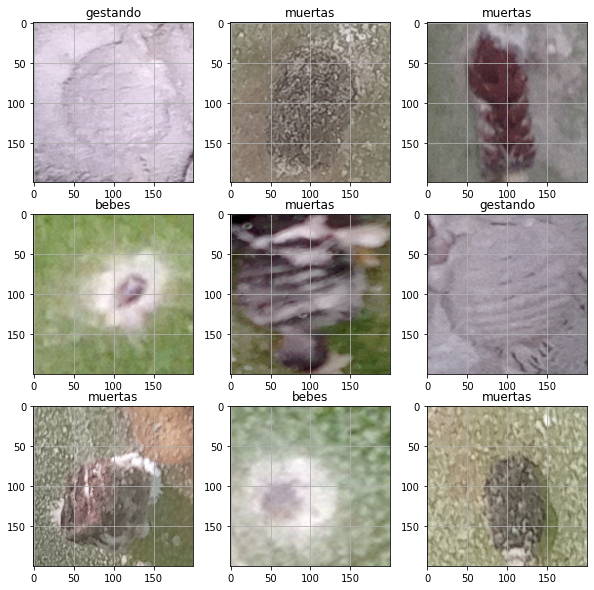

In [ ]:
# %% [code]
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

Text(0.5, 1.0, 'Bebes vs Gestando vs Muertas')

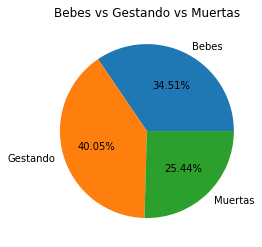

In [ ]:
# %% [code]
## data set
bebes = os.listdir('drive/MyDrive/Colab Notebooks/cochinilla/bebes')
gestando = os.listdir('drive/MyDrive/Colab Notebooks/cochinilla/gestando')
muertas = os.listdir('drive/MyDrive/Colab Notebooks/cochinilla/muertas')
plt.pie ([len(bebes), len(gestando), len(muertas)], labels = ['Bebes', 'Gestando', 'Muertas'],autopct='%1.2f%%')
plt.title('Bebes vs Gestando vs Muertas')

In [ ]:
# %% [code]
## defining data augumentation layer
#data_augmentation = tf.keras.Sequential([
  #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  #layers.experimental.preprocessing.RandomRotation(0.2),])

In [ ]:
# %% [code]
## ## lets define our CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(128, 3, activation='relu'),
  #layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  #layers.Dropout(0.25),
  layers.Dense(1, activation= 'sigmoid')
])


MyCnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# %% [code]
## rescheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# %% [code]
## training our model 
retVal = MyCnn.fit(training_ds, validation_data= testing_ds,callbacks=[callback], epochs = 14)

Epoch 1/14
9/9 [==============================] - 24s 3s/step - loss: 0.4662 - accuracy: 0.3994 - val_loss: 0.3301 - val_accuracy: 0.4103
Epoch 2/14
9/9 [==============================] - 15s 2s/step - loss: 0.2981 - accuracy: 0.3994 - val_loss: 0.2342 - val_accuracy: 0.4103
Epoch 3/14
9/9 [==============================] - 15s 2s/step - loss: 0.2052 - accuracy: 0.3994 - val_loss: 0.1337 - val_accuracy: 0.4103
Epoch 4/14
9/9 [==============================] - 15s 2s/step - loss: 0.1294 - accuracy: 0.3994 - val_loss: 0.0346 - val_accuracy: 0.4103
Epoch 5/14
9/9 [==============================] - 15s 2s/step - loss: 0.0262 - accuracy: 0.3994 - val_loss: -0.0749 - val_accuracy: 0.4103
Epoch 6/14
9/9 [==============================] - 15s 2s/step - loss: -0.0670 - accuracy: 0.3994 - val_loss: -0.1736 - val_accuracy: 0.4103
Epoch 7/14
9/9 [==============================] - 15s 2s/step - loss: -0.1576 - accuracy: 0.3994 - val_loss: -0.2809 - val_accuracy: 0.4103
Epoch 8/14
9/9 [=============

In [ ]:
# %% [code]
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()
plt.grid(True)

In [ ]:
# %% [code]
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.grid(True)


In [ ]:
# %% [code]
plt.plot(retVal.history['accuracy'], label = 'train accuracy')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.grid(True)

In [ ]:
# %% [code]
AccuracyVector = []
plt.figure(figsize=(30, 20))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[int (round(mem[0]))])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [ ]:
# %% [code]
tf.keras.utils.plot_model(
    MyCnn,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)


In [ ]:
# %% [code]
MyCnn.save('model1.h5')